Project DeepHealth, UC5 "Deep Image Annotation"

Franco Alberto Cardillo, ILC-CNR (UNITO) 

<francoalberto.cardillo@ilc.cnr.it>

SCUMBLE INDEX

In [1]:

%load_ext autoreload
%autoreload 2

import numpy as np
import os
import numpy as np
from numpy import count_nonzero as nnz
import pandas as pd
import pickle
from posixpath import join
import matplotlib.pyplot as plt
import matplotlib
from utils.scumble_metric import label_imbalance, compute_scumble
from matplotlib import rc
from cycler import cycler

In [5]:


rc("font", **{"family": "sans-serif", "sans-serif":["Helvetica"], "size":12})
## for Palatino and other serif fonts use:
rc("font", **{"family":"serif", "serif":["Palatino"], "size":12})
rc("text", usetex=False)
rc("figure", **{"dpi": 300})
rc("lines", **{"linewidth": 1, "markersize": 2})
rc("axes", **{"edgecolor": "gray", "facecolor":"white",
              "linewidth": 0.3, "labelsize": 12, "labelcolor": "gray",
              "grid": True})
rc("grid", **{"color": "gray", "linestyle": (0, (1, 3)), "linewidth": 0.3, "alpha": 0.5})
rc("legend", **{"facecolor": "grey", "markerscale": 0.7, "fontsize": 12, "framealpha": 0.1, "frameon":True, "edgecolor": "lightgray"})
rc("figure", **{"facecolor":"white", "edgecolor":"white"})

tick_color="black"
tick_fontsize=8
rc("xtick", **{"color": tick_color, "labelsize":tick_fontsize, "major.width": 0.2, "major.size":3, "major.pad":2})
rc("ytick", **{"color": tick_color, "labelsize":tick_fontsize, "major.width": 0.2, "major.size":3, "major.pad":2})

color_c    = cycler("color", ["k"])
style_c    = cycler("linestyle", ["-", "--", ":", "-."])
marker_c    = cycler("marker", ["", ".", "o"])
cycler_cms = color_c * marker_c * style_c
# c_csm = color_c * style_c * markr_c

color_c   = cycler("color", ["black", "gray", "darkgray", "lightgray"])
style_c   = cycler("linestyle", ["-", "--", "-."])
cycler_cs = style_c * color_c

cm = 1/2.54  # centimeters in inches
image_width  = 4
image_height = image_width / 1.618

plt.rc("axes", prop_cycle=cycler_cs)

In [11]:


def apply_threshold(dataset, min_freq):
    df = dataset.copy(deep=True)
    counts = df.sum(axis=0)
    iii = counts >= min_freq
    # print(f"{nnz(iii)} labels have at least {min_freq} freq")

    keep_labels = df.columns[iii]
    drop_labels = df.columns[~iii]
    df["misc"] = 0
    misc_iii = df[drop_labels].sum(axis=1) > 0
    df.loc[misc_iii, "misc"] = 1
    df.drop(columns=drop_labels, inplace=True)
    return df
# display(img_ds)
def compute_scumble_for_thresholds(df, left, right, step=10):
    n_cols = []
    scumbles = []
    min_freqs = np.arange(left, right, step)  # [10, 20, 50, 80, 100, 120, 130, 150, 200, 300]
    for th in min_freqs:
        th_df = apply_threshold(df, th)
        scumble, scumble_ins, scumble_cv, scumble_lbl = compute_scumble(th_df)
        # print("THRESHOLD:", th)
        # print("- labels: ", len(th_df.columns))
        # print("- scumble: ", scumble)
        # print("- scumble_ins: ", scumble_ins)
        # print("- scumble_cv: ", scumble_cv)
        # print("- scumble_lbl: ", scumble_lbl)
        # print()
        n_cols.append(len(th_df.columns))
        scumbles.append(scumble)
    return min_freqs, n_cols, scumbles
    

def save_scumbles(filename_wo_ext, min_freqs, n_cols, scumbles):
    fn = join(meta_fld, filename_wo_ext+".pkl")
    saved = {}
    saved["thresholds"] = list(min_freqs)
    saved["n_columns"] = n_cols
    saved["scumble"] = scumbles
    with open(fn, "wb") as f:
        pickle.dump(saved, f)
    print("pickle saved in:", fn)
    saved = pd.DataFrame.from_dict(saved)
    fn = join(meta_fld, filename_wo_ext+".csv")
    saved.to_csv(fn)
    print("csv saved in:", fn)

def plot_scumble(min_freqs, n_cols, scumbles, vlines=[70, 130], title=None):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    scumble_line, = plt.plot(min_freqs, scumbles, '-', lw=2, label="SCUMBLE")
    ax.set_ylim([0,1])
    ax2=ax.twinx()
    labels_line, = ax2.plot(min_freqs, n_cols, '--', lw=2, label="num labels")
    ax2.set_ylim([0, ds.shape[1]])
    ax2.set_ylabel("Number of labels")
    for vl in vlines:
        ax.vlines(vl, 0, 1, linestyle="-.", color="dimgray", alpha=0.5)
        # ax.vlines(130, 0, 1, linestyle="-.", color="dimgray", alpha=0.5)
    plt.legend([scumble_line, labels_line], ["SCUMBLE", "n labels"], loc="upper right")
    title = title or "SCUMBLE for different thresholds"
    plt.title(title)
    ax.set_xlabel("Threshold")
    ax.set_ylabel("SCUMBLE")
    # fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    # plt.plot(min_freqs, scumbles, '-o')
    # ax.set_ylim([0,1])
    # ax2=ax.twinx()
    # ax2.plot(min_freqs, n_cols, '-o', c="r")
    # ax2.set_ylim([0, ds.shape[1]])



original shape: (7244, 117)
removing 2656 rows for label normal
reduced shape: (4588, 116)


/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:31: RuntimeWarning: invalid value encountered in double_scalars
  cvir = sigma / mean_irlbl
/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:55: RuntimeWarning: invalid value encountered in multiply
  product = np.multiply(enc, np.repeat(irlbl_1, enc.shape[0], axis=0))


pickle saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_1000.pkl
csv saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_1000.csv


/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:31: RuntimeWarning: invalid value encountered in double_scalars
  cvir = sigma / mean_irlbl
/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:55: RuntimeWarning: invalid value encountered in multiply
  product = np.multiply(enc, np.repeat(irlbl_1, enc.shape[0], axis=0))


pickle saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_400.pkl
csv saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_400.csv


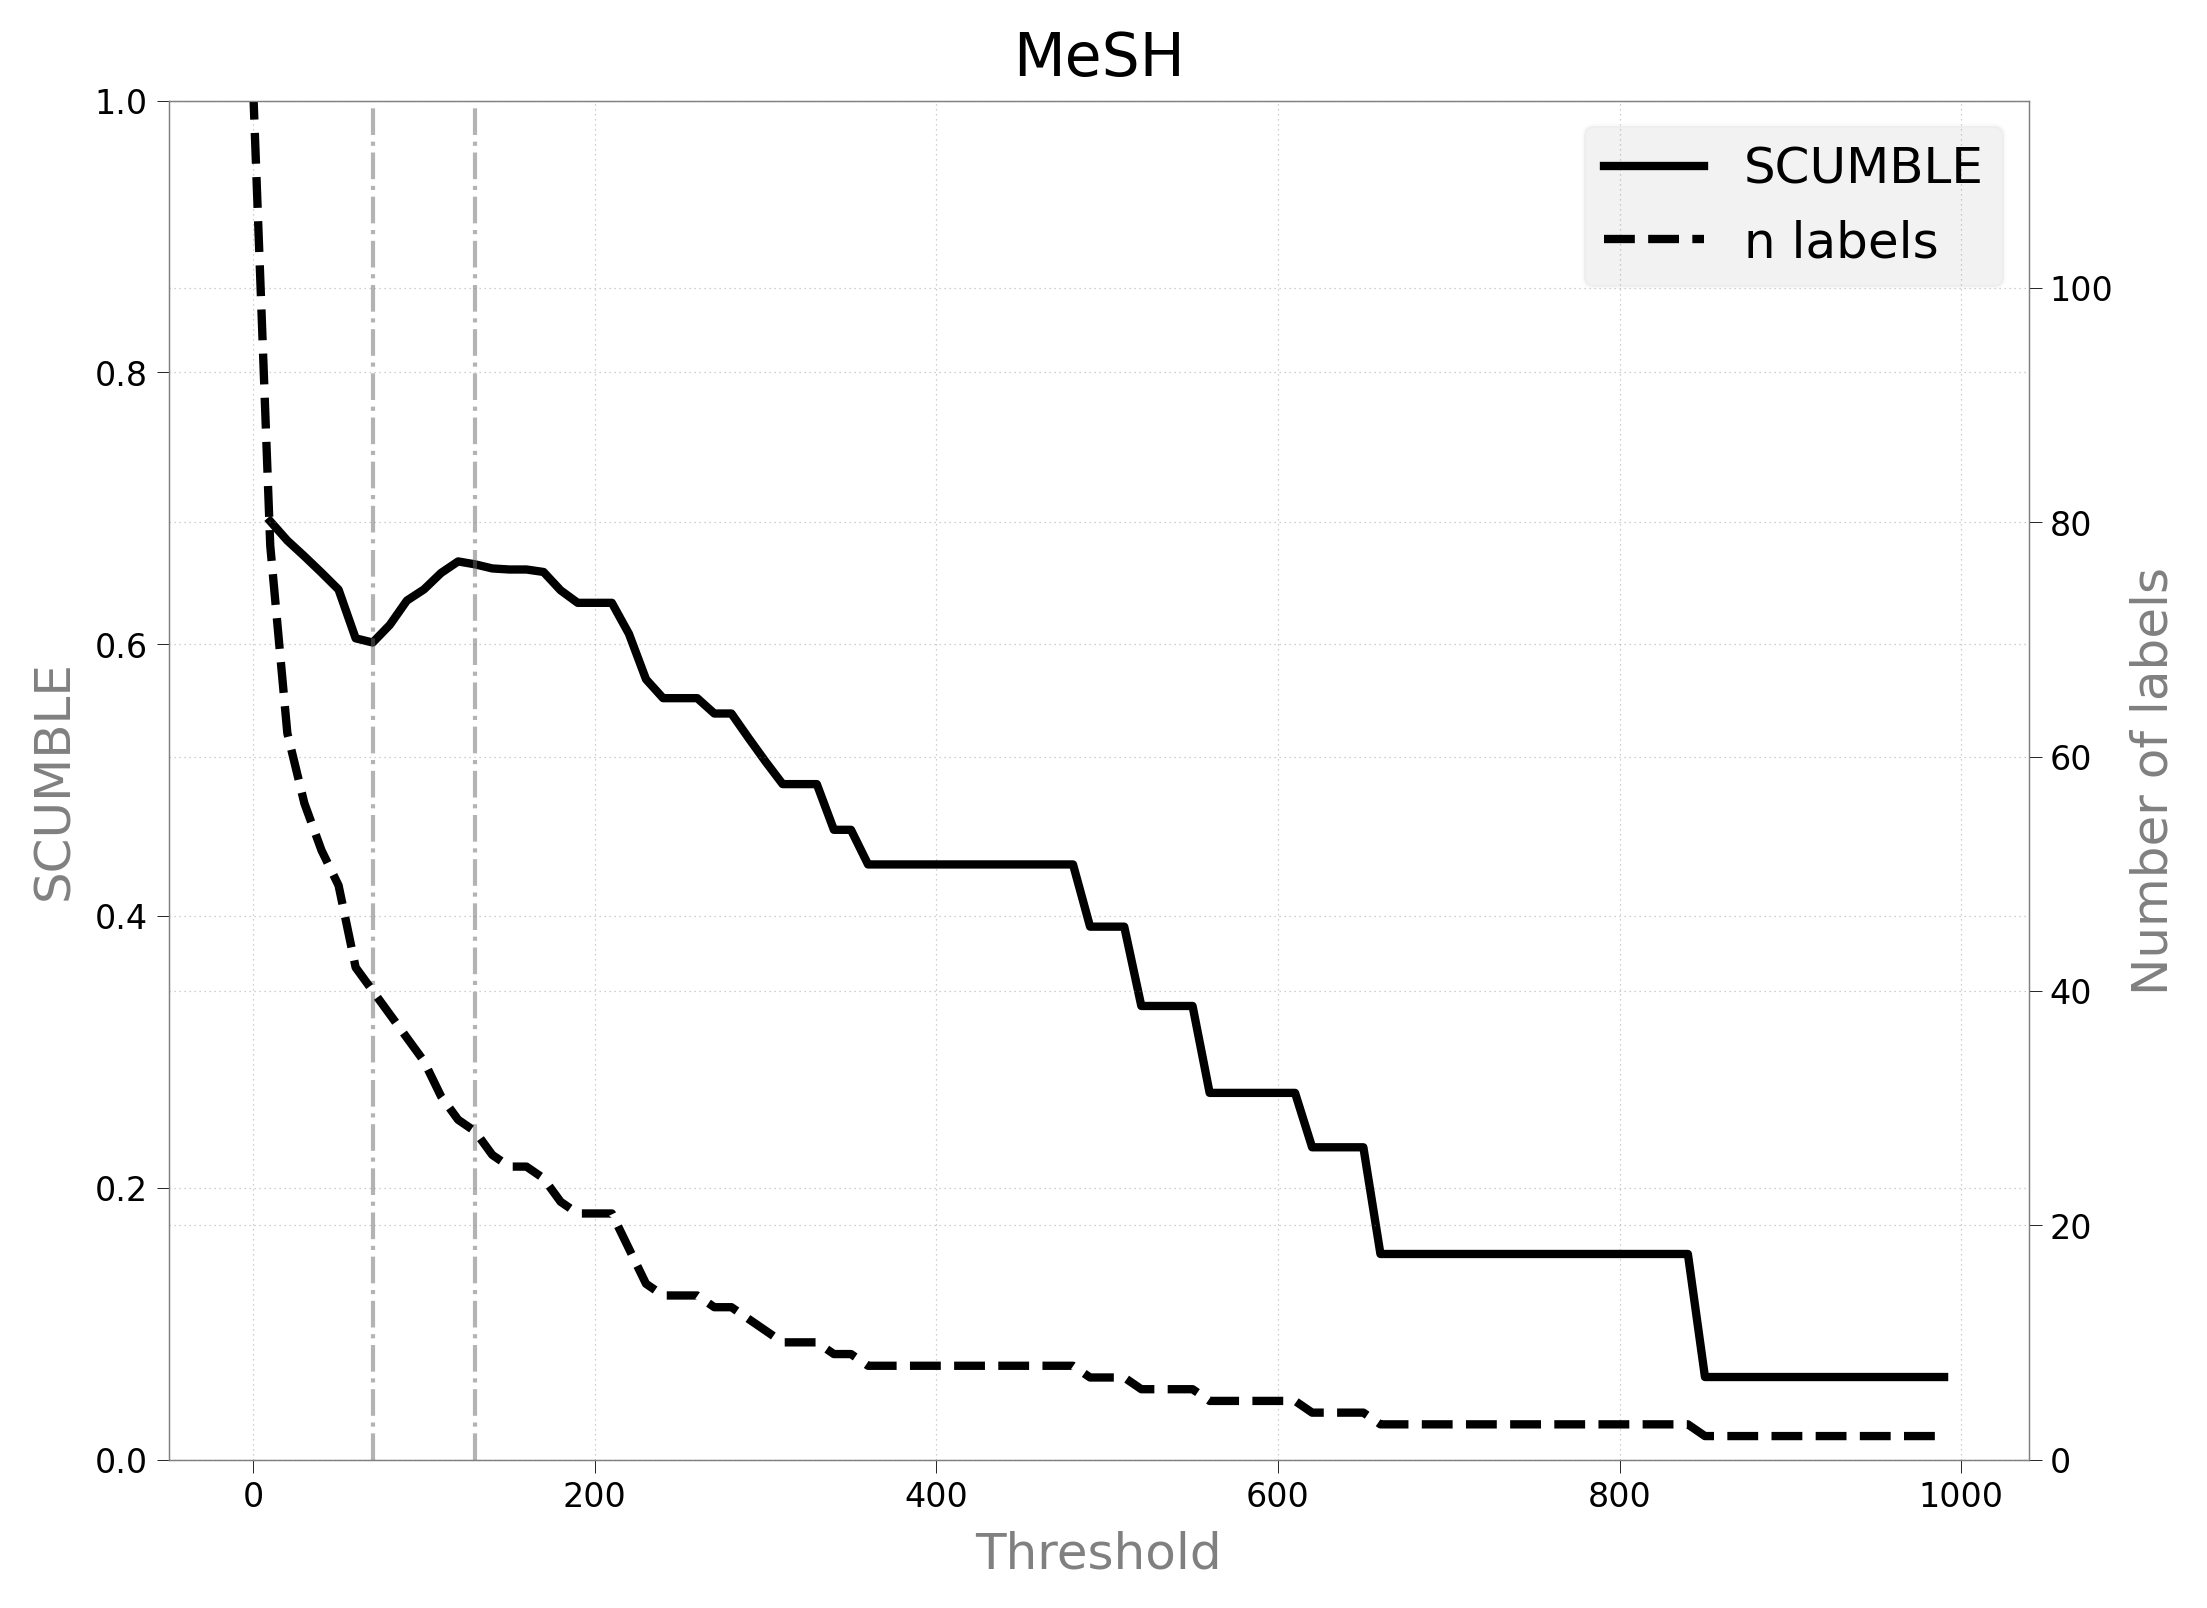

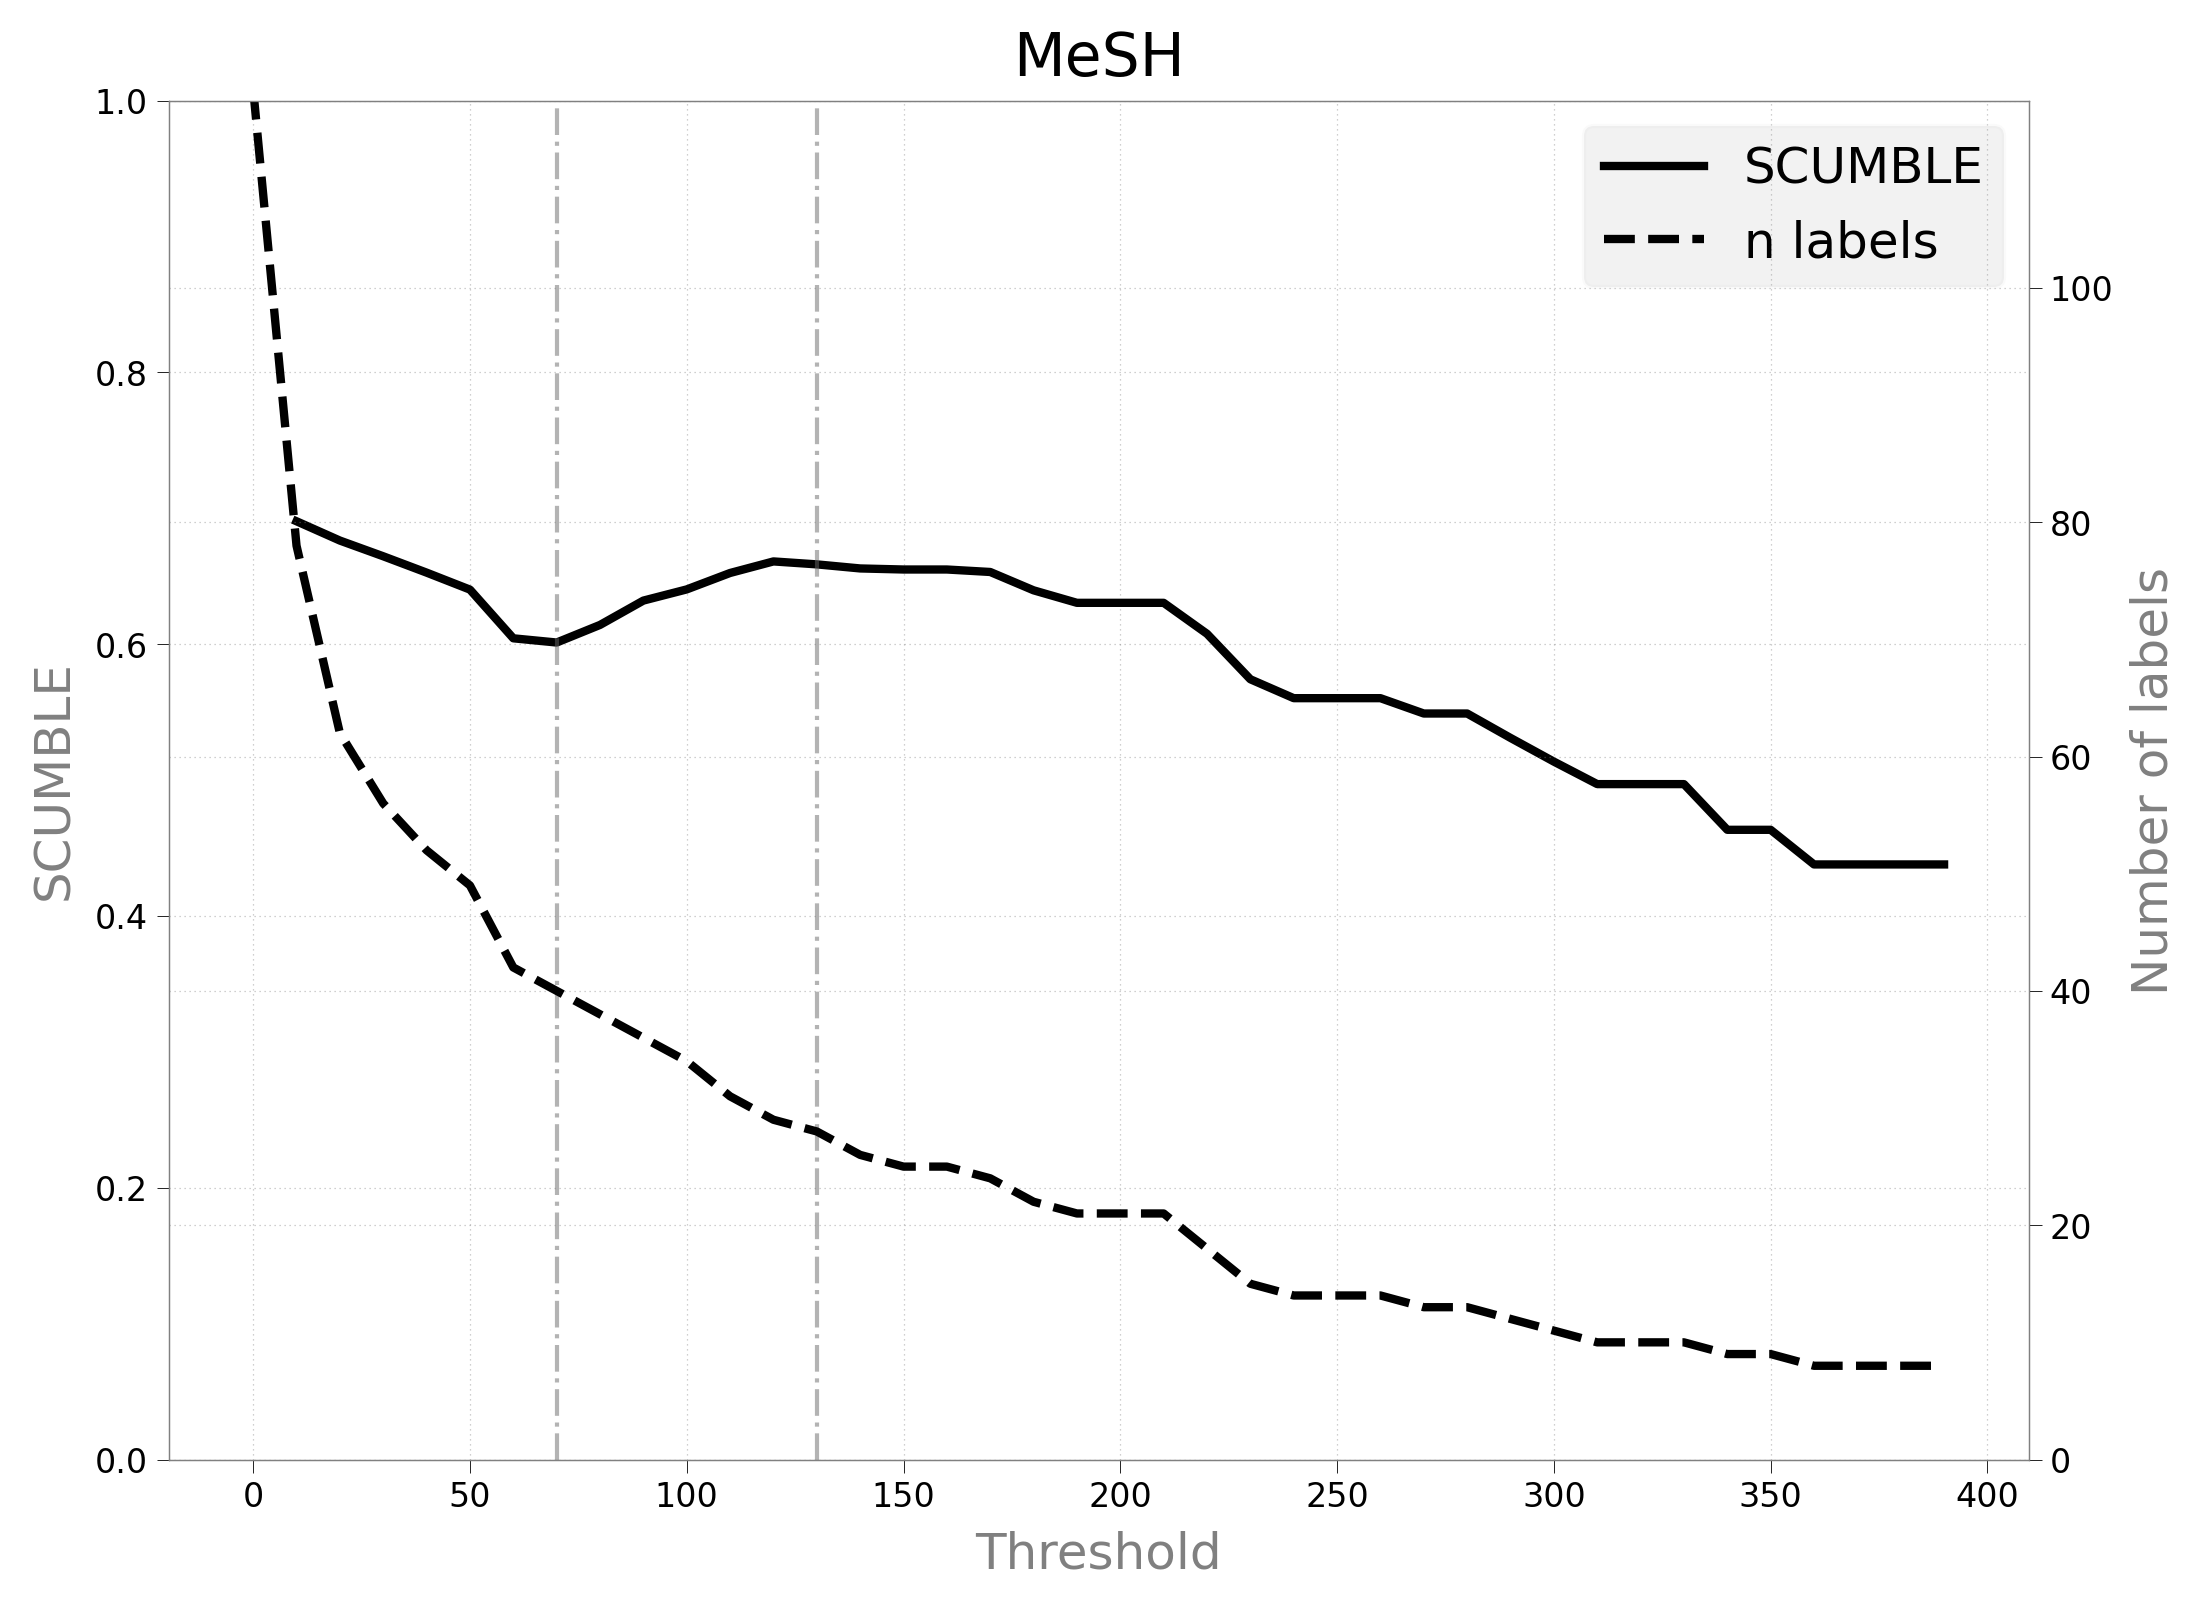

In [12]:
# MeSH

meta_fld = "/mnt/datasets/uc5/meta/eddl/iuchest"

ds = pd.read_pickle( join(meta_fld, "img_dataset.pkl") )
# print(ds.columns)

print("original shape:", ds.shape)
# remove normal
cols_to_remove = ["normal"]
# for c in cols_to_remove:
#     print(c in ds.columns)

for c in cols_to_remove:
    iii = ds[c] == 1
    print(f"removing {nnz(iii)} rows for label {c}")
    ds = ds.drop(ds[iii].index )

ds = ds.drop(columns=cols_to_remove)
print("reduced shape:", ds.shape)


ff1 = [0, 0]
ff2 = [1000, 400]

for f1, f2 in zip(ff1, ff2):
    min_freqs, n_cols, scumbles = compute_scumble_for_thresholds(ds, f1, f2)
    # print("|thresholds| = ", len(min_freqs))
    # print(len(n_cols))
    # print(len(scumbles))
    save_scumbles(f"scumbles_{f1}_{f2}", min_freqs, n_cols, scumbles)
    plot_scumble(min_freqs, n_cols, scumbles, title="MeSH")


original shape: (7244, 523)
removing 3206 rows for label normal
reduced shape: (4038, 522)


/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:31: RuntimeWarning: invalid value encountered in double_scalars
  cvir = sigma / mean_irlbl
/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:55: RuntimeWarning: invalid value encountered in multiply
  product = np.multiply(enc, np.repeat(irlbl_1, enc.shape[0], axis=0))
/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:28: RuntimeWarning: invalid value encountered in double_scalars
  sigma = sigma / (lds.shape[0]-1)
/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:28: RuntimeWarning: invalid value encountered in double_scalars
  sigma = sigma / (lds.shape[0]-1)
/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:28: RuntimeWarning: invalid value encountered in double_scalars
  sigma = sigma / (lds.shape[0]-1)
/mnt/datasets/uc5/UC5_last/src/preproc/utils/scumble_metric.py:28: RuntimeWarning: invalid value encountered in double_scalars
  sigma = sigma / (lds.shape[0]-1)
/mnt/

pickle saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_1000.pkl
csv saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_1000.csv
pickle saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_400.pkl
csv saved in: /mnt/datasets/uc5/meta/eddl/iuchest/scumbles_0_400.csv


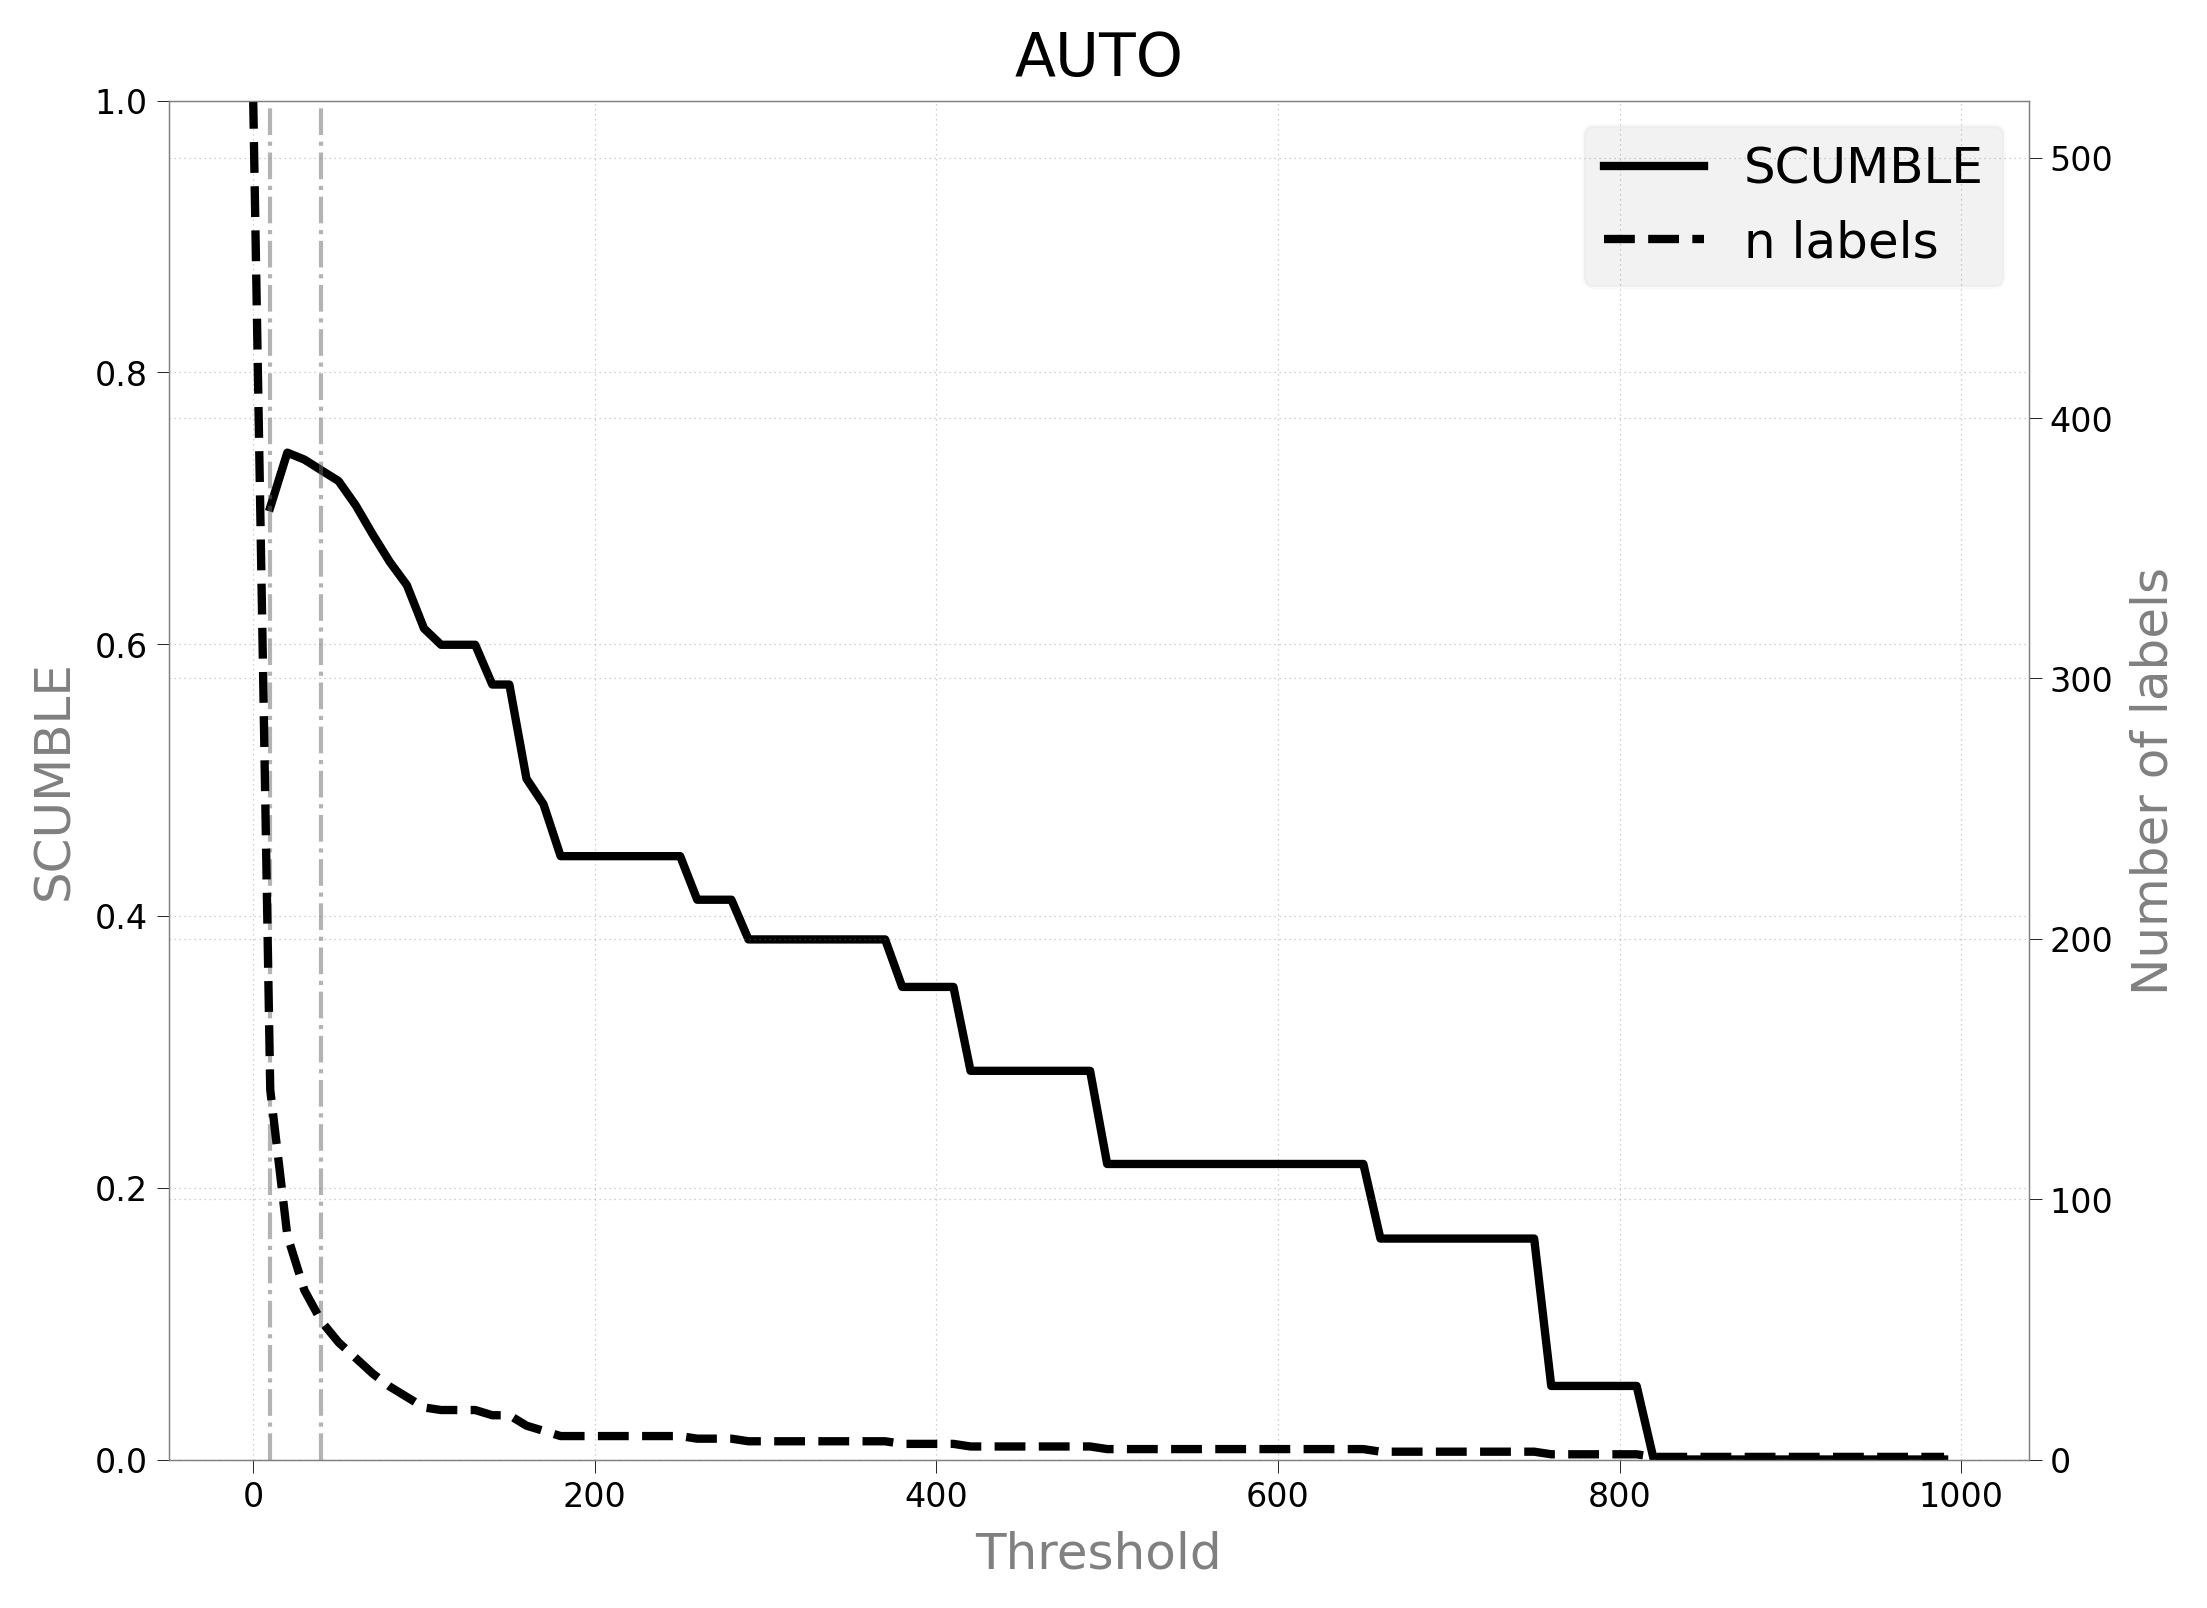

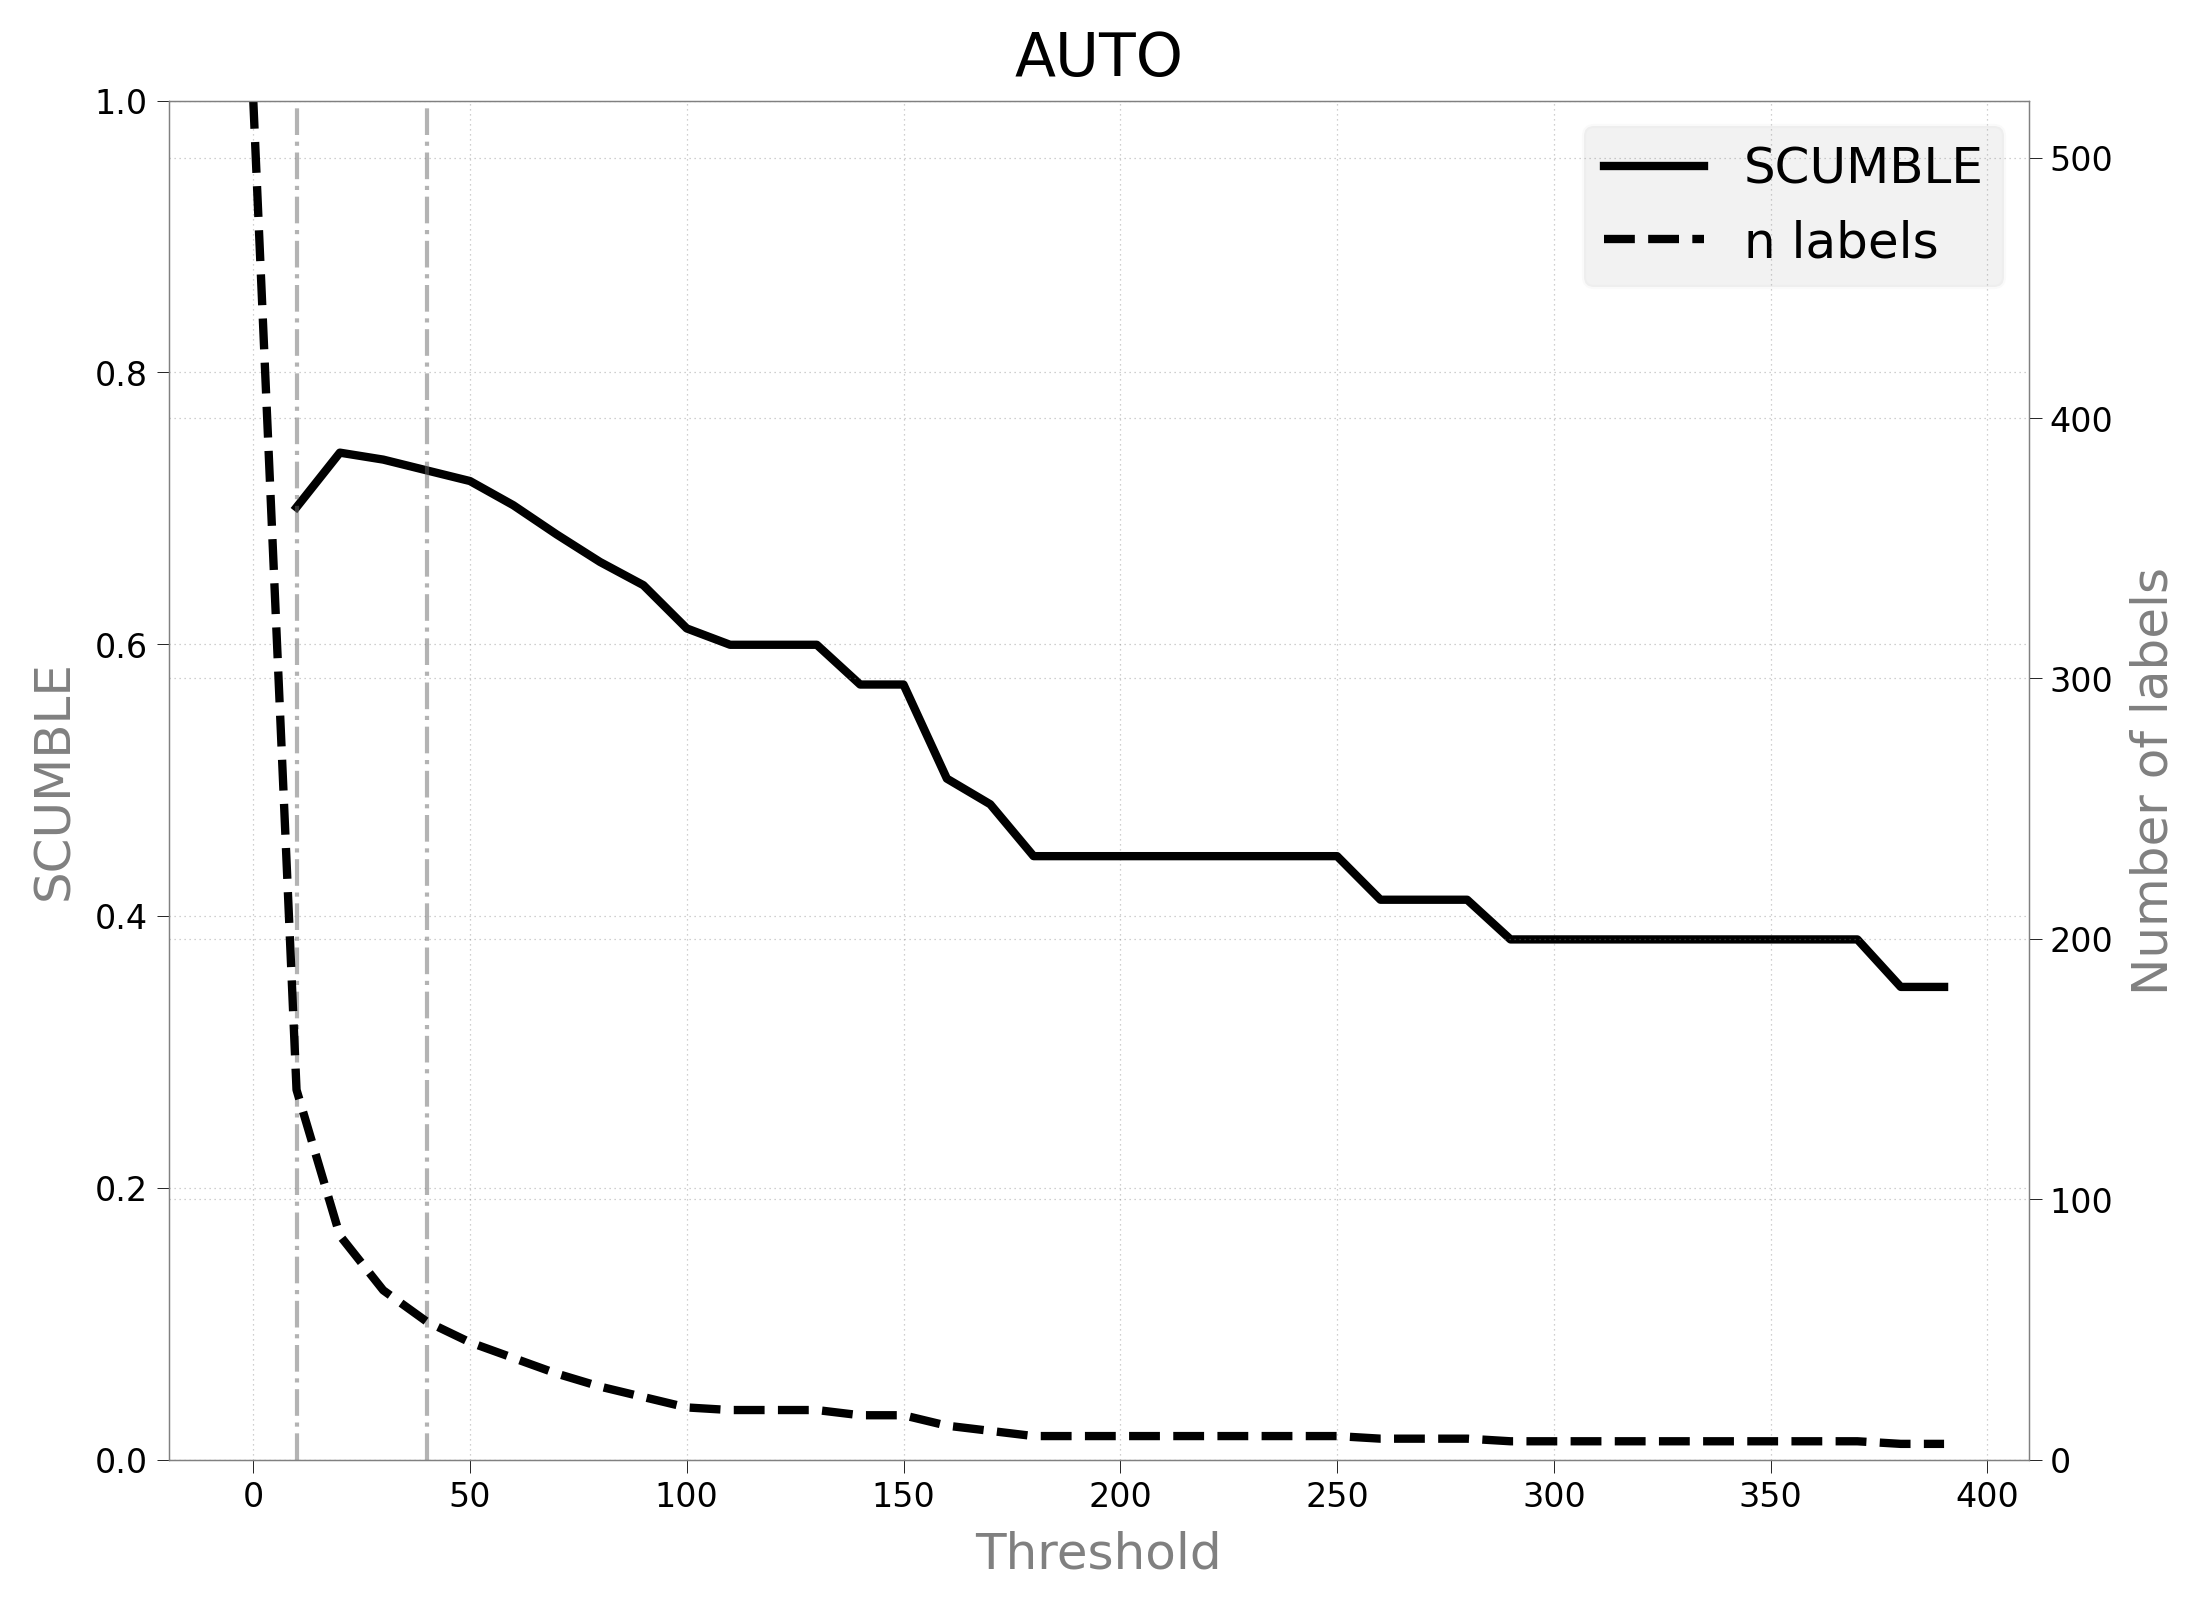

In [10]:
# Auto

meta_fld = "/mnt/datasets/uc5/meta/eddl/iuchest"

ds = pd.read_pickle( join(meta_fld, "img_dataset_auto.pkl") )
# print(ds.columns)

print("original shape:", ds.shape)
# remove normal
cols_to_remove = ["normal"]
# for c in cols_to_remove:
#     print(c in ds.columns)

for c in cols_to_remove:
    iii = ds[c] == 1
    print(f"removing {nnz(iii)} rows for label {c}")
    ds = ds.drop(ds[iii].index )

ds = ds.drop(columns=cols_to_remove)
print("reduced shape:", ds.shape)


ff1 = [0, 0]
ff2 = [1000, 400]

for f1, f2 in zip(ff1, ff2):
    min_freqs, n_cols, scumbles = compute_scumble_for_thresholds(ds, f1, f2)
    # print("|thresholds| = ", len(min_freqs))
    # print(len(n_cols))
    # print(len(scumbles))
    save_scumbles(f"scumbles_{f1}_{f2}", min_freqs, n_cols, scumbles)
    plot_scumble(min_freqs, n_cols, scumbles, vlines=[10, 40], title="AUTO")
